In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
holidays = pd.read_csv('holidays.csv')
items = pd.read_csv("items.csv")
oil  = pd.read_csv("oil.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
transaction = pd.read_csv("transactions.csv")

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [11]:
sample = pd.read_csv("sample_submission.csv",encoding='utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 2: invalid start byte

In [9]:
test = pd.read_csv("test.csv")

## Data Reduction

In [12]:
test

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False
...,...,...,...,...,...
3370459,128867499,2017-08-31,54,2132163,False
3370460,128867500,2017-08-31,54,2132318,False
3370461,128867501,2017-08-31,54,2132945,False
3370462,128867502,2017-08-31,54,2132957,False


In [13]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True


In [5]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [6]:
test_data = pd.read_csv("test.csv")

In [7]:
test_data.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


### EDA 

In [ ]:
dtype_dict={"id":np.uint32,
            "store_nbr":np.uint8,
            "item_nbr":np.uint32,
            "unit_sales":np.float16
           }

In [11]:
train["date"] = pd.to_datetime(train["date"])

In [12]:
train.set_index('date', inplace=True)


## Test_data

In [32]:
print("Number of unique combination of store_nbr and item_nbr",test_data.groupby(['store_nbr','item_nbr']).count().shape[0])


Number of unique combination of store_nbr and item_nbr 210654


In [43]:
transaction.shape

(83488, 3)

In [37]:
holidays.shape
items.shape
oil.shape
stores.shape
train.shape
transaction.shape

(83488, 3)

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2013-01-01,0,25,103665,7.0,NaN
2013-01-01,1,25,105574,1.0,NaN
2013-01-01,2,25,105575,2.0,NaN
2013-01-01,3,25,108079,1.0,NaN
2013-01-01,4,25,108701,1.0,NaN


<AxesSubplot:xlabel='date'>

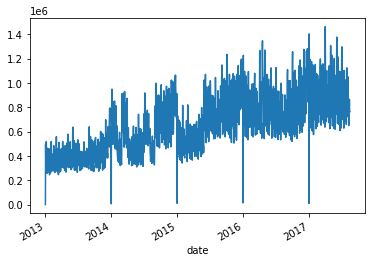

In [19]:
train.groupby("date")["unit_sales"].sum().plot()

## Train Dataset

In [16]:
train["store_nbr"].value_counts()

44    3513089
45    3484244
47    3457407
3     3401264
46    3353890
49    3342531
8     3261184
48    3236523
50    3192566
6     3089799
2     2987840
51    2960031
7     2921204
37    2831691
4     2830554
9     2773790
24    2769889
38    2727731
5     2666691
39    2638036
27    2631714
11    2568282
1     2562153
41    2503919
28    2418816
23    2365697
31    2361724
34    2299422
36    2211162
18    2196682
17    2164020
40    2102799
25    2057020
33    1963485
43    1939694
15    1938678
53    1938255
19    1879155
12    1836583
16    1820035
14    1805941
26    1793082
10    1740482
13    1736728
20    1665985
54    1648867
30    1597862
29    1508959
42    1461683
35    1388104
21    1373419
32    1362615
22     923483
52     290581
Name: store_nbr, dtype: int64

## Oil

In [37]:
pd.read_csv("oil.csv")

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [38]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [39]:
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [40]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [41]:
transaction

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


## Concatenation of datasets 

In [42]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True


In [45]:
m = pd.merge(train,oil)

In [56]:
#Train,oil = m + stores =c

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,dcoilwtico
0,0,2013-01-01,25,103665,7.0,NaN,NaN
19811,19811,2013-01-02,25,103665,5.0,NaN,93.14
100696,100696,2013-01-04,25,103665,5.0,NaN,93.12
140474,224881,2013-01-07,25,103665,2.0,NaN,93.20
296188,380595,2013-01-11,25,103665,4.0,NaN,93.60
...,...,...,...,...,...,...,...
87244366,124819742,2017-08-09,25,103665,1.0,False,49.59
87344289,124919665,2017-08-10,25,103665,7.0,False,48.54
87444117,125019493,2017-08-11,25,103665,6.0,False,48.81
87549468,125336140,2017-08-14,25,103665,2.0,False,47.59


In [61]:
c = pd.merge(stores,train)

In [8]:
test

NameError: name 'test' is not defined